## Exercise 01 — Line chart with styles

This notebook compares page views and checker commits per day for user accounts only.

In [27]:
import pandas as pd
import sqlite3

DB_PATH = '../data/checking-logs.sqlite'


In [28]:
connection = sqlite3.connect(DB_PATH)
pageviews_query = (
    """
    SELECT datetime
    FROM pageviews
    WHERE uid LIKE 'user_%'
    """
)
commits_query = (
    """
    SELECT timestamp
    FROM checker
    WHERE uid LIKE 'user_%'
    """
)
try:
    pageviews = pd.read_sql_query(pageviews_query, connection, parse_dates=['datetime'])
    commits = pd.read_sql_query(commits_query, connection, parse_dates=['timestamp'])
finally:
    connection.close()

pageviews.head()


,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144


In [29]:
commits.head()

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [30]:
pageviews['date'] = pageviews['datetime'].dt.date
commits['date'] = commits['timestamp'].dt.date

views_daily = (
    pageviews
    .groupby('date')
    .size()
    .rename('views')
)
commits_daily = (
    commits
    .groupby('date')
    .size()
    .rename('commits')
)

daily_activity = (
    pd.concat([views_daily, commits_daily], axis=1, join='inner')
    .sort_index()
)
daily_activity.index = pd.to_datetime(daily_activity.index)
views_over_150 = int((daily_activity['views'] > 150).sum())
daily_activity.head()


,views,commits
date,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28


<Axes: title={'center': 'Views and commits per day'}, xlabel='date', ylabel='count'>

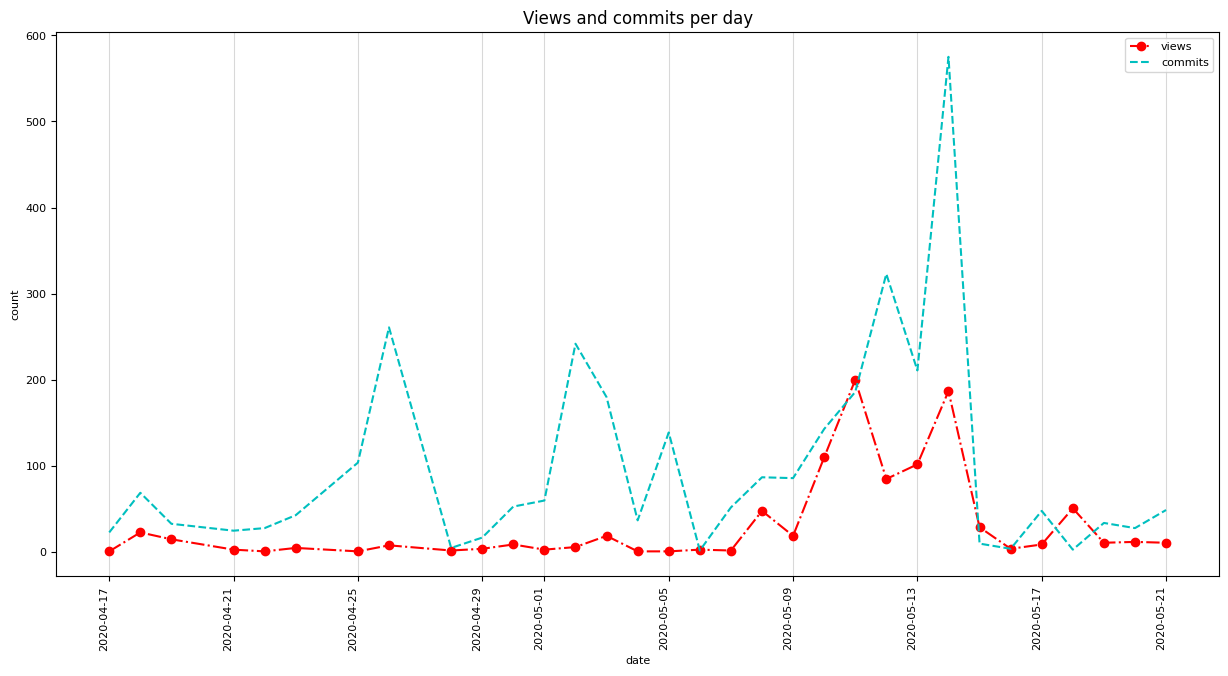

In [31]:
ax = daily_activity.plot(
    y=['views', 'commits'],
    figsize=(15, 8),
    fontsize=8,
    title='Views and commits per day',
    style=['r-.o', 'c--'],
    lw=1.5,
)
ax.set_xlabel('date', fontsize=8)
ax.set_ylabel('count', fontsize=8)
ax.tick_params(axis='x', labelrotation=90)
ax.tick_params(axis='y', labelsize=8)
ax.grid(axis='x', color='gray', alpha=0.3)
ax.legend(fontsize=8, loc='upper right')
ax


In [36]:
print(daily_activity[daily_activity['views'] > 150].shape[0])

2


How many times was the number of views larger than 150? 
* The answer is 2.